In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from pylab import rcParams
import os
from tqdm import tqdm

In [2]:
files = [os.path.join('data/dataset/', f) for f in os.listdir('data/dataset/')]
dfdata = pd.DataFrame()
for f in tqdm(files):

    h5 = h5py.File(f, 'r')

    keys = ['E', 'azimuth', 'cycle', 'eff', 'enter.x', 'enter.y', 'enter.z', 'evt', 'exit.x', 'exit.y', 'exit.z',
            'nhitslc', 'nhittot', 'p.E', 'p.px', 'p.py', 'p.pz', 'pdg', 'penter.E', 'penter.px', 'penter.py',
            'penter.pz',
            'rec.mc.cosmic_idx', 'run', 'stop.x', 'stop.y', 'stop.z', 'subevt', 'subrun', 'time', 'visE', 'visEinslc',
            'vtx.x', 'vtx.y', 'vtx.z', 'zenith']
    data = pd.DataFrame()
    for k in keys:
        data[k] = pd.DataFrame(h5[k])

    #data['cvnmap'] = np.array(f['cvnmap'])
    data['euclidean'] = (((data['vtx.x'] - data['stop.x']) ** 2) +
                         (data['vtx.y'] - data['stop.y']) ** 2 +
                         (data['vtx.z'] - data['stop.z']) ** 2) ** .5


    def set_values(row, value):
        return value[row]


    map_dictionary = {11: 1, 13: 0, -211: 2}

    data['label'] = data['pdg'].apply(set_values, args=(map_dictionary,))

    h5.close()
    dfdata = pd.concat([dfdata, data],
                       ignore_index=True)
dfdata

100%|██████████| 2989/2989 [05:19<00:00,  9.37it/s]


,E,azimuth,cycle,eff,enter.x,enter.y,enter.z,evt,exit.x,exit.y,...,subrun,time,visE,visEinslc,vtx.x,vtx.y,vtx.z,zenith,euclidean,label
0,1.706486,2.590457,0,1.000000,57.197571,-8.897424,53.937347,961,-4.573000,9.138374,...,19,14005.0,0.945229,0.945229,57.197571,-8.897424,53.937347,-0.204848,80.995926,1
1,0.984304,1.921182,0,0.999742,-122.303650,109.621239,161.948975,133,-129.019821,39.828960,...,19,14005.0,0.559785,0.559641,-122.303650,109.621239,161.948975,0.966977,72.341995,1
2,4.875452,-1.410617,0,0.991403,-126.638290,-145.367905,639.660034,913,-116.645882,-164.115311,...,19,14005.0,1.128640,1.118937,-126.638290,-145.367905,639.660034,0.344875,55.028706,1
3,0.619690,1.015395,0,1.000000,-147.323227,-85.382751,320.650421,724,-142.068787,-142.595001,...,19,14005.0,0.174495,0.174495,-147.323227,-85.382751,320.650421,0.969673,59.334763,1
4,1.892111,-3.096459,0,0.998630,-98.762085,-71.649002,470.146423,233,-147.510574,-7.106601,...,19,14005.0,0.932748,0.931470,-98.762085,-71.649002,470.146423,-0.789564,80.923500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149445,0.378008,1.590094,0,0.853130,-2.028179,23.365307,474.820007,1531,-10.871884,-21.376598,...,0,14005.0,0.185925,0.158618,-2.028179,23.365307,474.820007,0.382194,116.472855,0
149446,1.592348,-1.683670,0,0.971325,-118.720650,134.297974,950.566956,1987,-166.421448,-6.745108,...,0,14005.0,1.013507,0.984444,-118.720650,134.297974,950.566956,0.185656,738.165039,0
149447,0.187975,1.086285,0,0.909831,-8.794808,-0.185132,618.794006,1001,1.550654,-11.576729,...,0,14005.0,0.060334,0.054894,-8.794808,-0.185132,618.794006,0.414365,24.738651,0
149448,0.360791,-1.085491,0,1.000000,-169.231598,51.664352,430.558319,363,-122.274002,1.842017,...,0,14005.0,0.156087,0.156087,-169.231598,51.664352,430.558319,0.459921,112.796448,0


In [20]:
muon = dfdata[dfdata['label'] == 0]
electron = dfdata[dfdata['label'] == 1]
piminus = dfdata[dfdata['label'] == 2]
del dfdata

In [33]:



def scatter_hist_plot(x, y, xlabel, ylabel, title, xmin, xmax, ymin, ymax):
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]
    # no labels
    # start with a square Figure
    fig = plt.figure(figsize=(8, 8))
    fig.suptitle(title, fontsize=20)
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)
    ax.set_ylabel(ylabel, size=18)
    ax.set_xlabel(xlabel, size=18)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax_histx.hist(x, histtype='step')
    ax_histy.hist(y, histtype='step', orientation='horizontal')
    plt.savefig('plots/variables/' + title + 'jpg')
    plt.show()

In [36]:
def scatter_hist(x, y, xmin, xmax, ymin, ymax):
    scatter_hist_plot(muon[x], muon[y], x, y, 'muon ' + x + ' vs ' + y, xmin, xmax, ymin, ymax)
    scatter_hist_plot(electron[x], electron[y], x, y, 'electron ' + x + ' vs ' + y, xmin, xmax, ymin, ymax)
    scatter_hist_plot(piminus[x], piminus[y], x, y, 'piminus ' + x + ' vs ' + y, xmin, xmax, ymin, ymax)

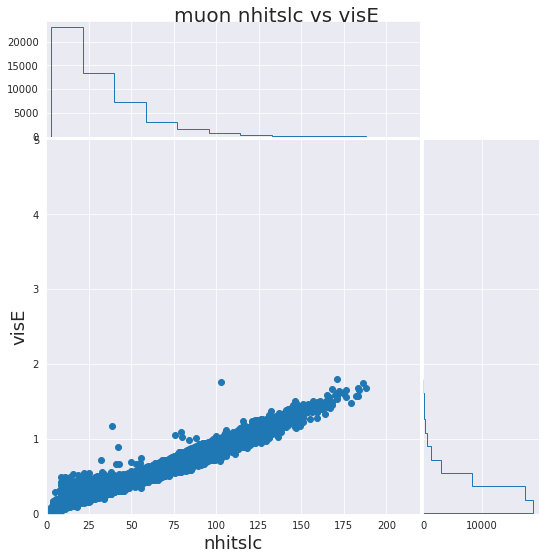

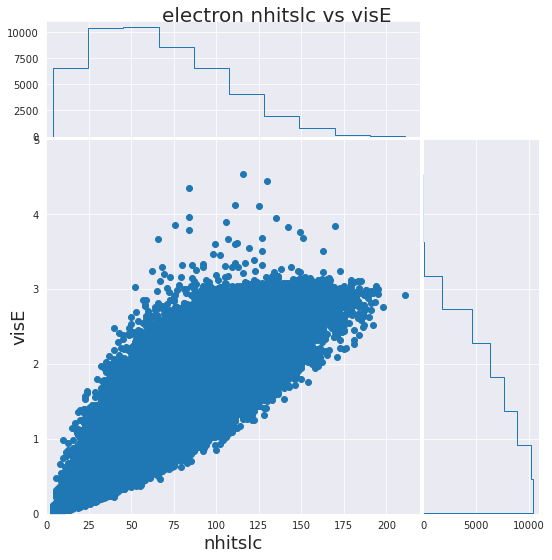

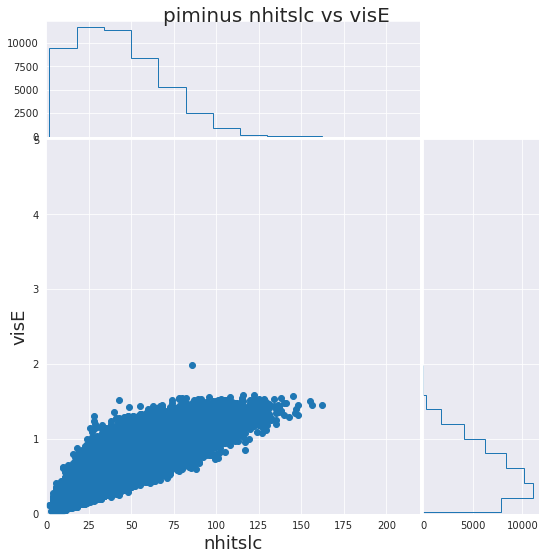

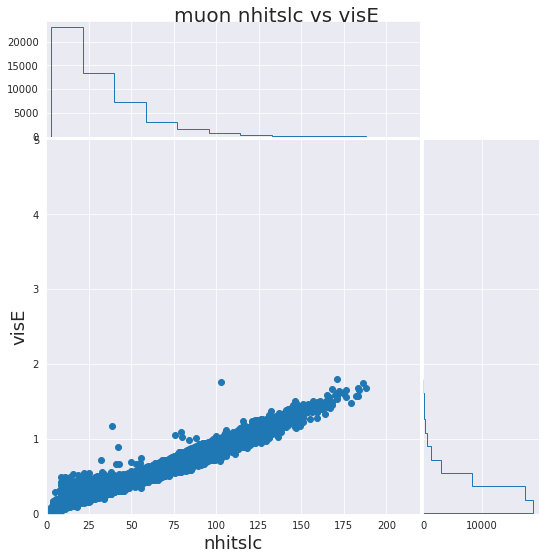

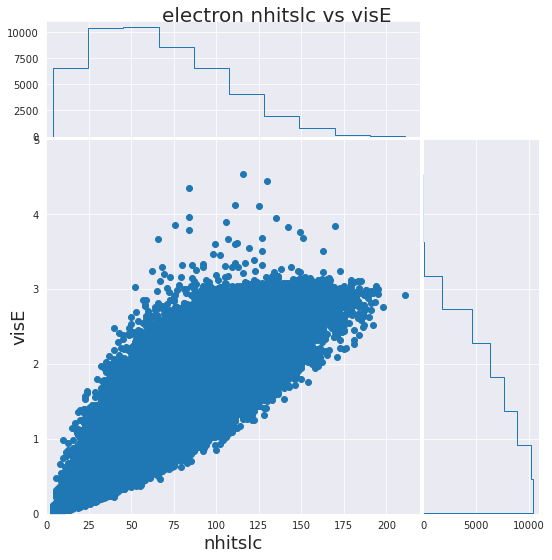

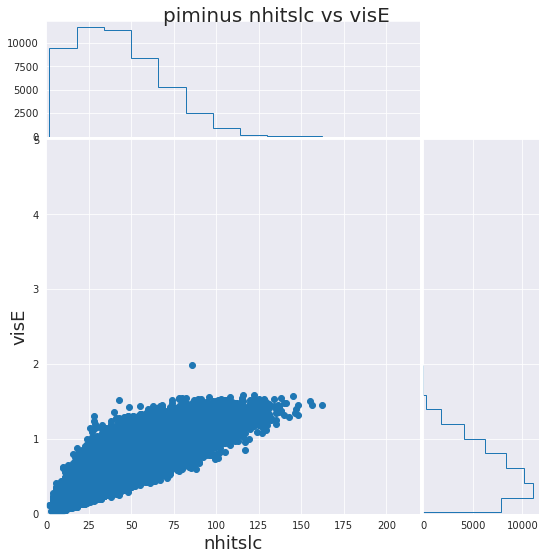

In [37]:

# use the previously defined function
x = 'nhitslc'
y = 'visE'
xmin = 0
xmax = 220
ymin = 0
ymax = 5
scatter_hist(x, y, xmin, xmax, ymin, ymax)

# use the previously defined function
x = 'nhitslc'
y = 'visE'
xmin = 0
xmax = 220
ymin = 0
ymax = 5
scatter_hist(x, y, xmin, xmax, ymin, ymax)



/tmp/ipykernel_4505/2682093855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muon['nhitslc-nhittot'] = muon['nhitslc'] - muon['nhittot']
/tmp/ipykernel_4505/2682093855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electron['nhitslc-nhittot'] = electron['nhitslc'] - electron['nhittot']
/tmp/ipykernel_4505/2682093855.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

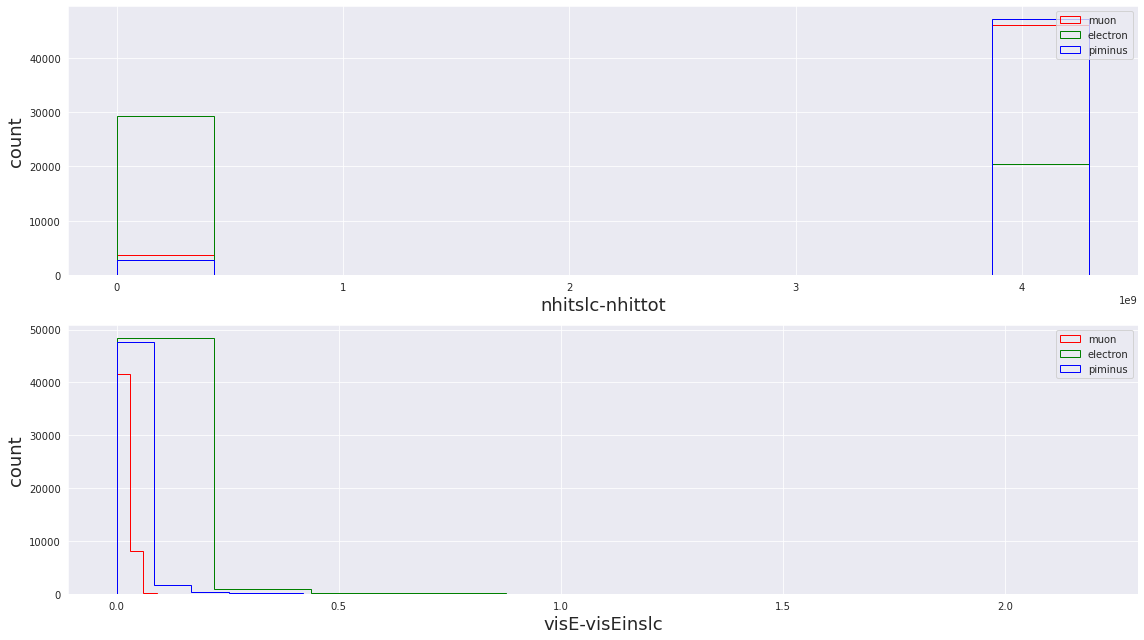

In [42]:
rcParams['figure.figsize'] = 16, 9
fig, axes = plt.subplots(nrows=2, ncols=1)
muon['nhitslc-nhittot'] = muon['nhitslc'] - muon['nhittot']
electron['nhitslc-nhittot'] = electron['nhitslc'] - electron['nhittot']
piminus['nhitslc-nhittot'] = piminus['nhitslc'] - piminus['nhittot']

muon['visE-visEinslc'] = muon['visE'] - muon['visEinslc']
electron['visE-visEinslc'] = electron['visE'] - electron['visEinslc']
piminus['visE-visEinslc'] = piminus['visE'] - piminus['visEinslc']
for var, ax in zip(['nhitslc-nhittot', 'visE-visEinslc', ], axes):
    for dataset, color, label in zip([muon, electron, piminus], ["red", "green", "blue"],
                                     ['muon', 'electron', 'piminus']):
        ax.hist(dataset[var], 10, histtype='step', stacked=True, fill=False,
                color=color, label=label)

        ax.legend()
        ax.set_xlabel(var, size=18)
        ax.set_ylabel('count', size=18)
fig.tight_layout()
plt.savefig('plots/dist_score_label.jpg')
plt.show()

In [43]:
muon

,E,azimuth,cycle,eff,enter.x,enter.y,enter.z,evt,exit.x,exit.y,...,visE,visEinslc,vtx.x,vtx.y,vtx.z,zenith,euclidean,label,nhitslc-nhittot,visE-visEinslc
100,0.699730,1.337014,0,0.957238,-151.492386,33.318974,141.997238,45,-90.432007,-141.529602,...,0.408781,0.391301,-151.492386,33.318974,141.997238,0.738895,266.776489,0,4294967294,0.017480
101,0.356373,1.633869,0,0.929960,-140.461594,-55.570030,299.768890,11,-145.064941,-98.319588,...,0.177761,0.165311,-140.461594,-55.570030,299.768890,0.364758,109.512978,0,4294967293,0.012450
102,0.283497,0.268817,0,0.981707,-3.050971,-123.985886,168.953140,778,61.944992,-110.656471,...,0.172879,0.169717,-3.050971,-123.985886,168.953140,-0.172026,70.605255,0,4294967294,0.003162
103,0.191799,1.248068,0,0.860968,-93.035248,43.793869,120.176453,1231,-88.180222,57.088440,...,0.069338,0.059697,-93.035248,43.793869,120.176453,-0.524290,26.428434,0,4294967294,0.009640
104,0.144272,2.577934,0,0.664429,40.571617,67.424370,565.238159,1967,35.091309,64.466408,...,0.045541,0.030259,40.571617,67.424370,565.238159,0.360375,7.115945,0,4294967295,0.015282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149445,0.378008,1.590094,0,0.853130,-2.028179,23.365307,474.820007,1531,-10.871884,-21.376598,...,0.185925,0.158618,-2.028179,23.365307,474.820007,0.382194,116.472855,0,4294967293,0.027307
149446,1.592348,-1.683670,0,0.971325,-118.720650,134.297974,950.566956,1987,-166.421448,-6.745108,...,1.013507,0.984444,-118.720650,134.297974,950.566956,0.185656,738.165039,0,4294967292,0.029062
149447,0.187975,1.086285,0,0.909831,-8.794808,-0.185132,618.794006,1001,1.550654,-11.576729,...,0.060334,0.054894,-8.794808,-0.185132,618.794006,0.414365,24.738651,0,4294967294,0.005440
149448,0.360791,-1.085491,0,1.000000,-169.231598,51.664352,430.558319,363,-122.274002,1.842017,...,0.156087,0.156087,-169.231598,51.664352,430.558319,0.459921,112.796448,0,0,0.000000
